# 오버워치 2 점수판 분석 AI

In [1]:
import os
import pandas as pd

players = 10


def prepare_scoreboards(defeat_, draw_, victory_):
    scoreboards_ = pd.concat([defeat_, draw_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = os.path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
draw = pd.read_csv(datapath + 'draw.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, draw, victory)
scoreboards

E   A   D    DMG      H    MIT    GAME
0   0   7   3   6   5933   1068   6199  DEFEAT
    1   7   0  10   3601    747      0  DEFEAT
    2   9   1   6   4352      0      0  DEFEAT
    3   7   7   2   2332   6325      0  DEFEAT
    4   6   4   2   3410   5979    606  DEFEAT
...    ..  ..  ..    ...    ...    ...     ...
235 5  34   9   7  15597   1508  15282  DEFEAT
    6  28   1  12  14064   1339    238  DEFEAT
    7  29   1  13  12145      0     48  DEFEAT
    8  11  26   9   2798  16190   1352  DEFEAT
    9   4  24   8    743  20730    176  DEFEAT

[2360 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2360 entries, (0, 0) to (235, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       2360 non-null   int64 
 1   A       2360 non-null   int64 
 2   D       2360 non-null   int64 
 3   DMG     2360 non-null   int64 
 4   H       2360 non-null   int64 
 5   MIT     2360 non-null   int64 
 6   GAME    2360 non-null   object
dtypes: int64(6), object(1)
memory usage: 146.3+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000
mean,13.863983,7.386441,6.370763,6246.041949,3868.091102,2310.433051
std,10.285359,8.678360,3.895551,4630.640232,5169.926104,4652.380967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,3.000000,2681.250000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5340.000000,790.500000,243.000000
75%,20.000000,12.000000,9.000000,9285.000000,7392.000000,1717.000000
max,56.000000,48.000000,21.000000,29354.000000,27756.000000,41092.000000


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = os.path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
tank = scoreboards[::players]
damage = pd.concat([scoreboards[1::players], scoreboards[2::players]])
support = pd.concat([scoreboards[3::players], scoreboards[4::players]])

그림 저장:tank_hist


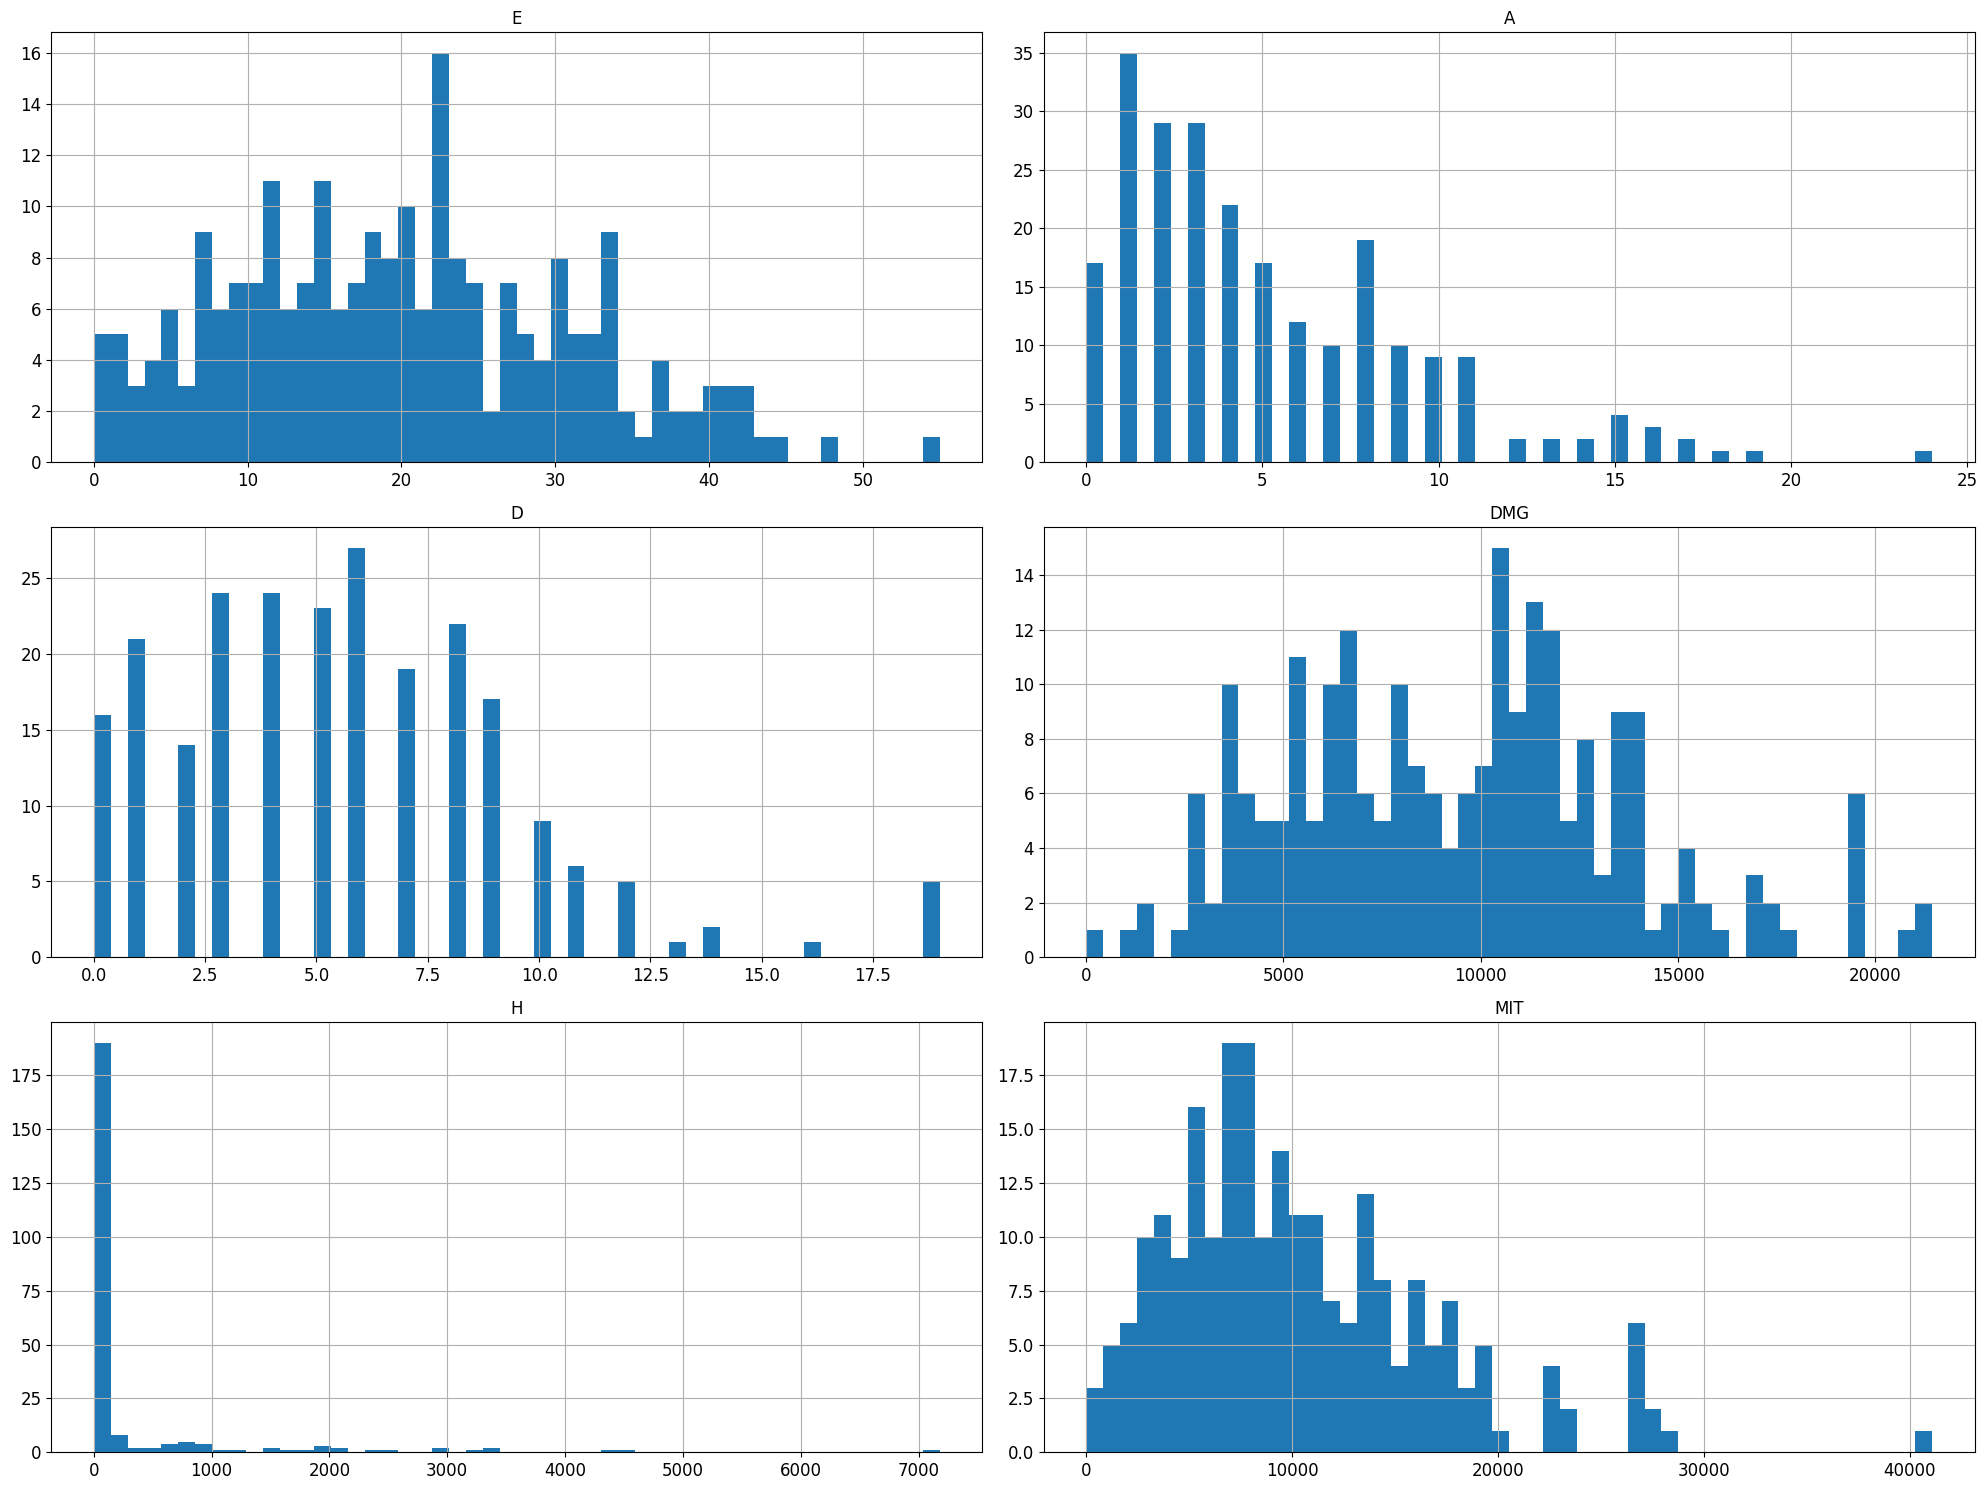

In [6]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


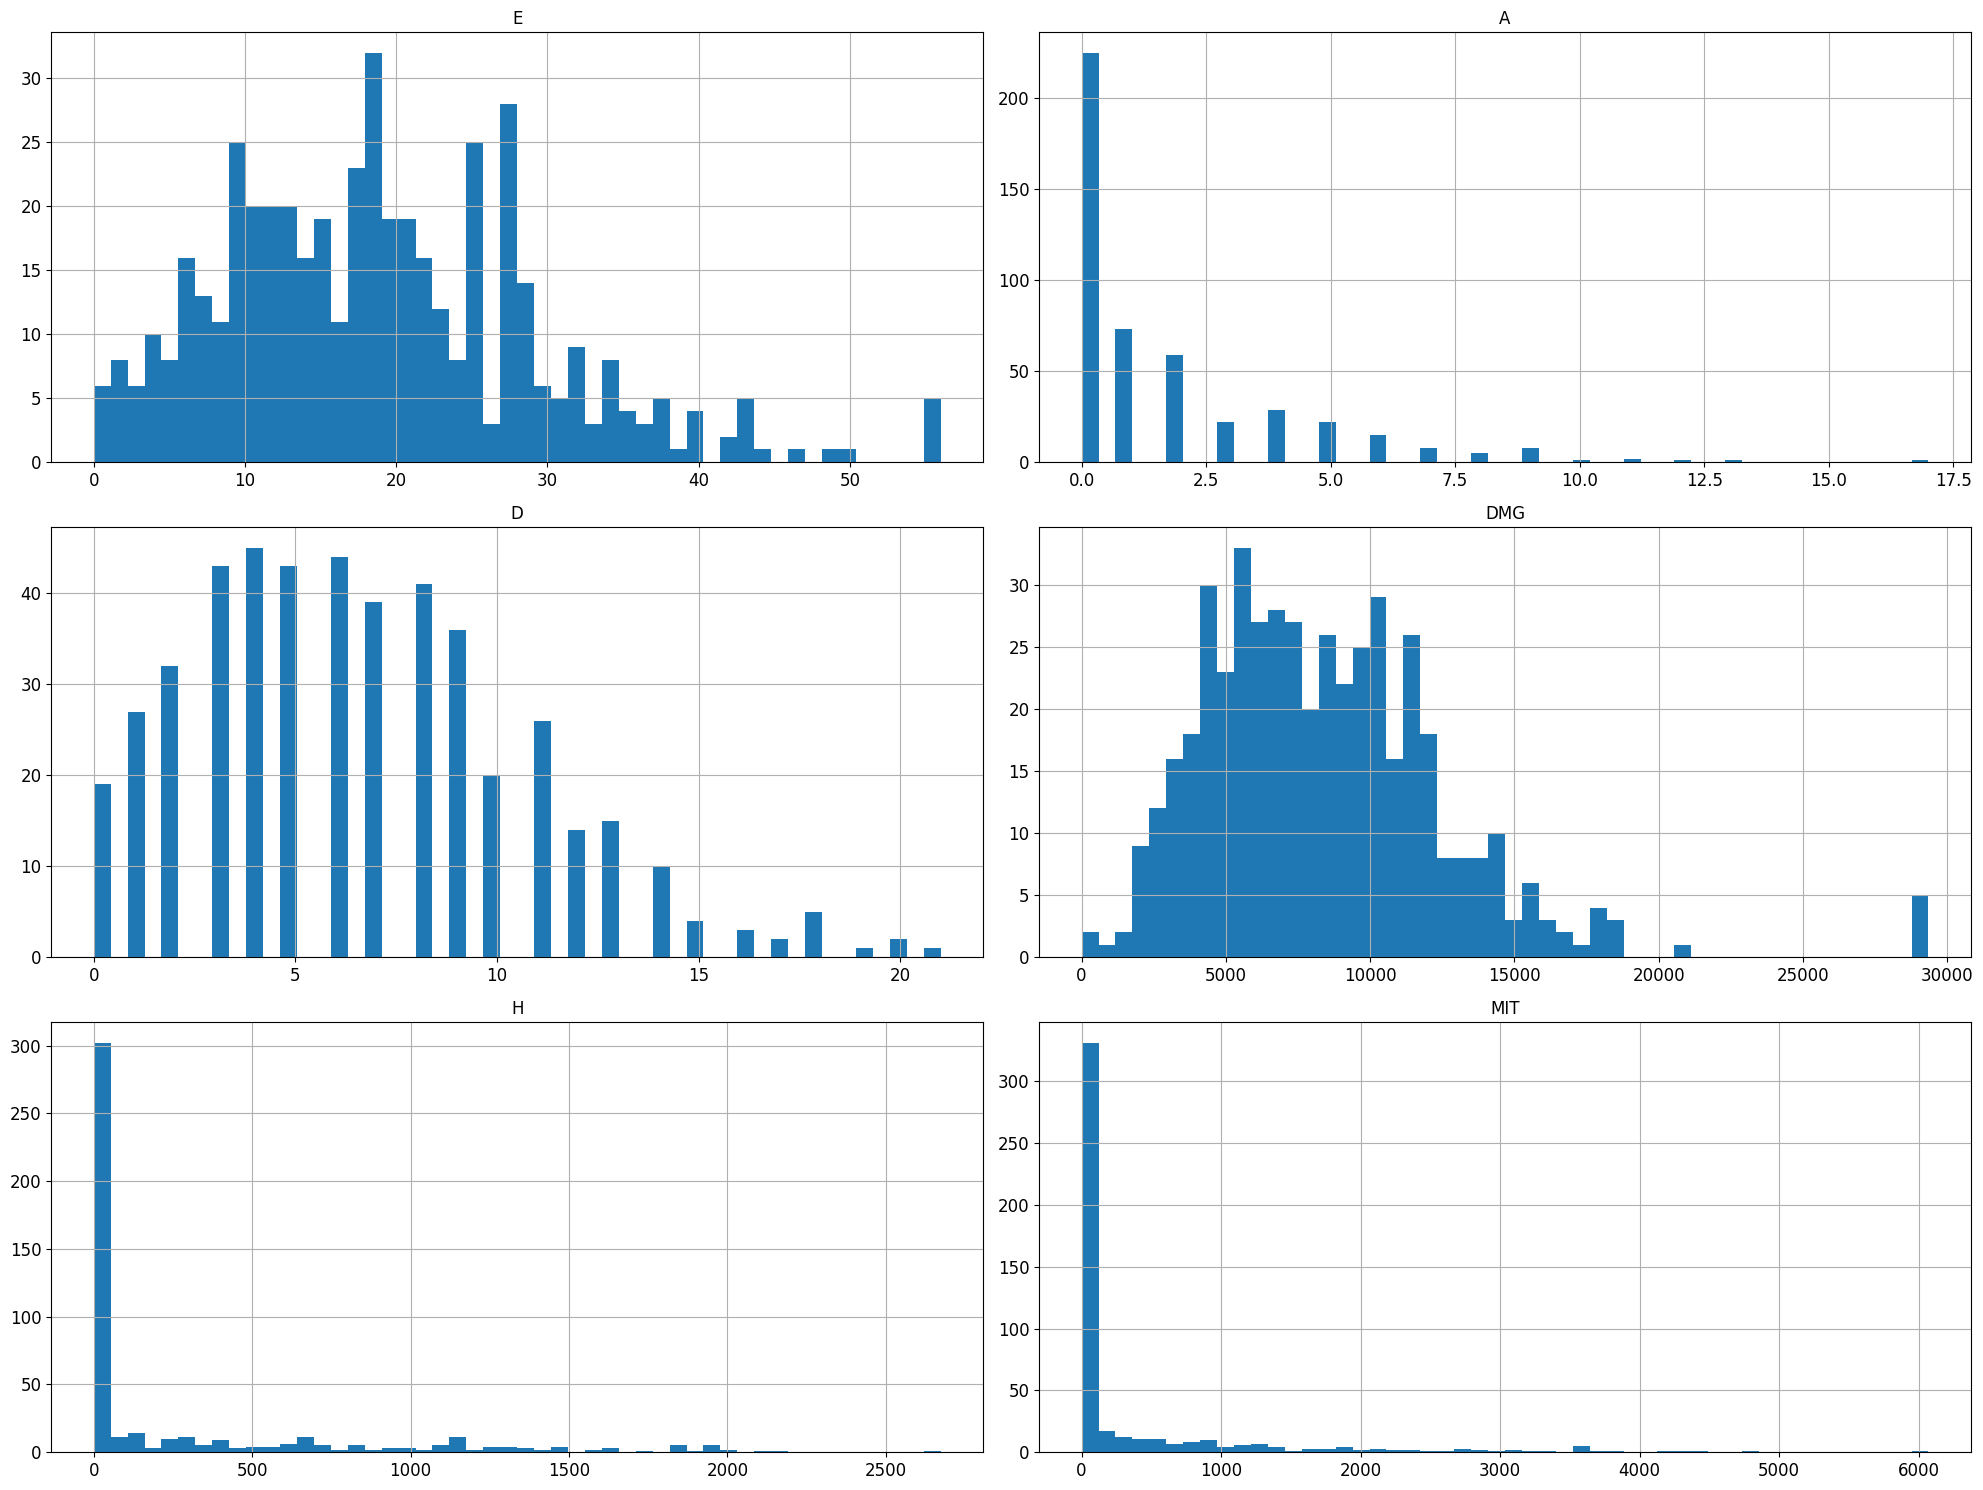

In [7]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


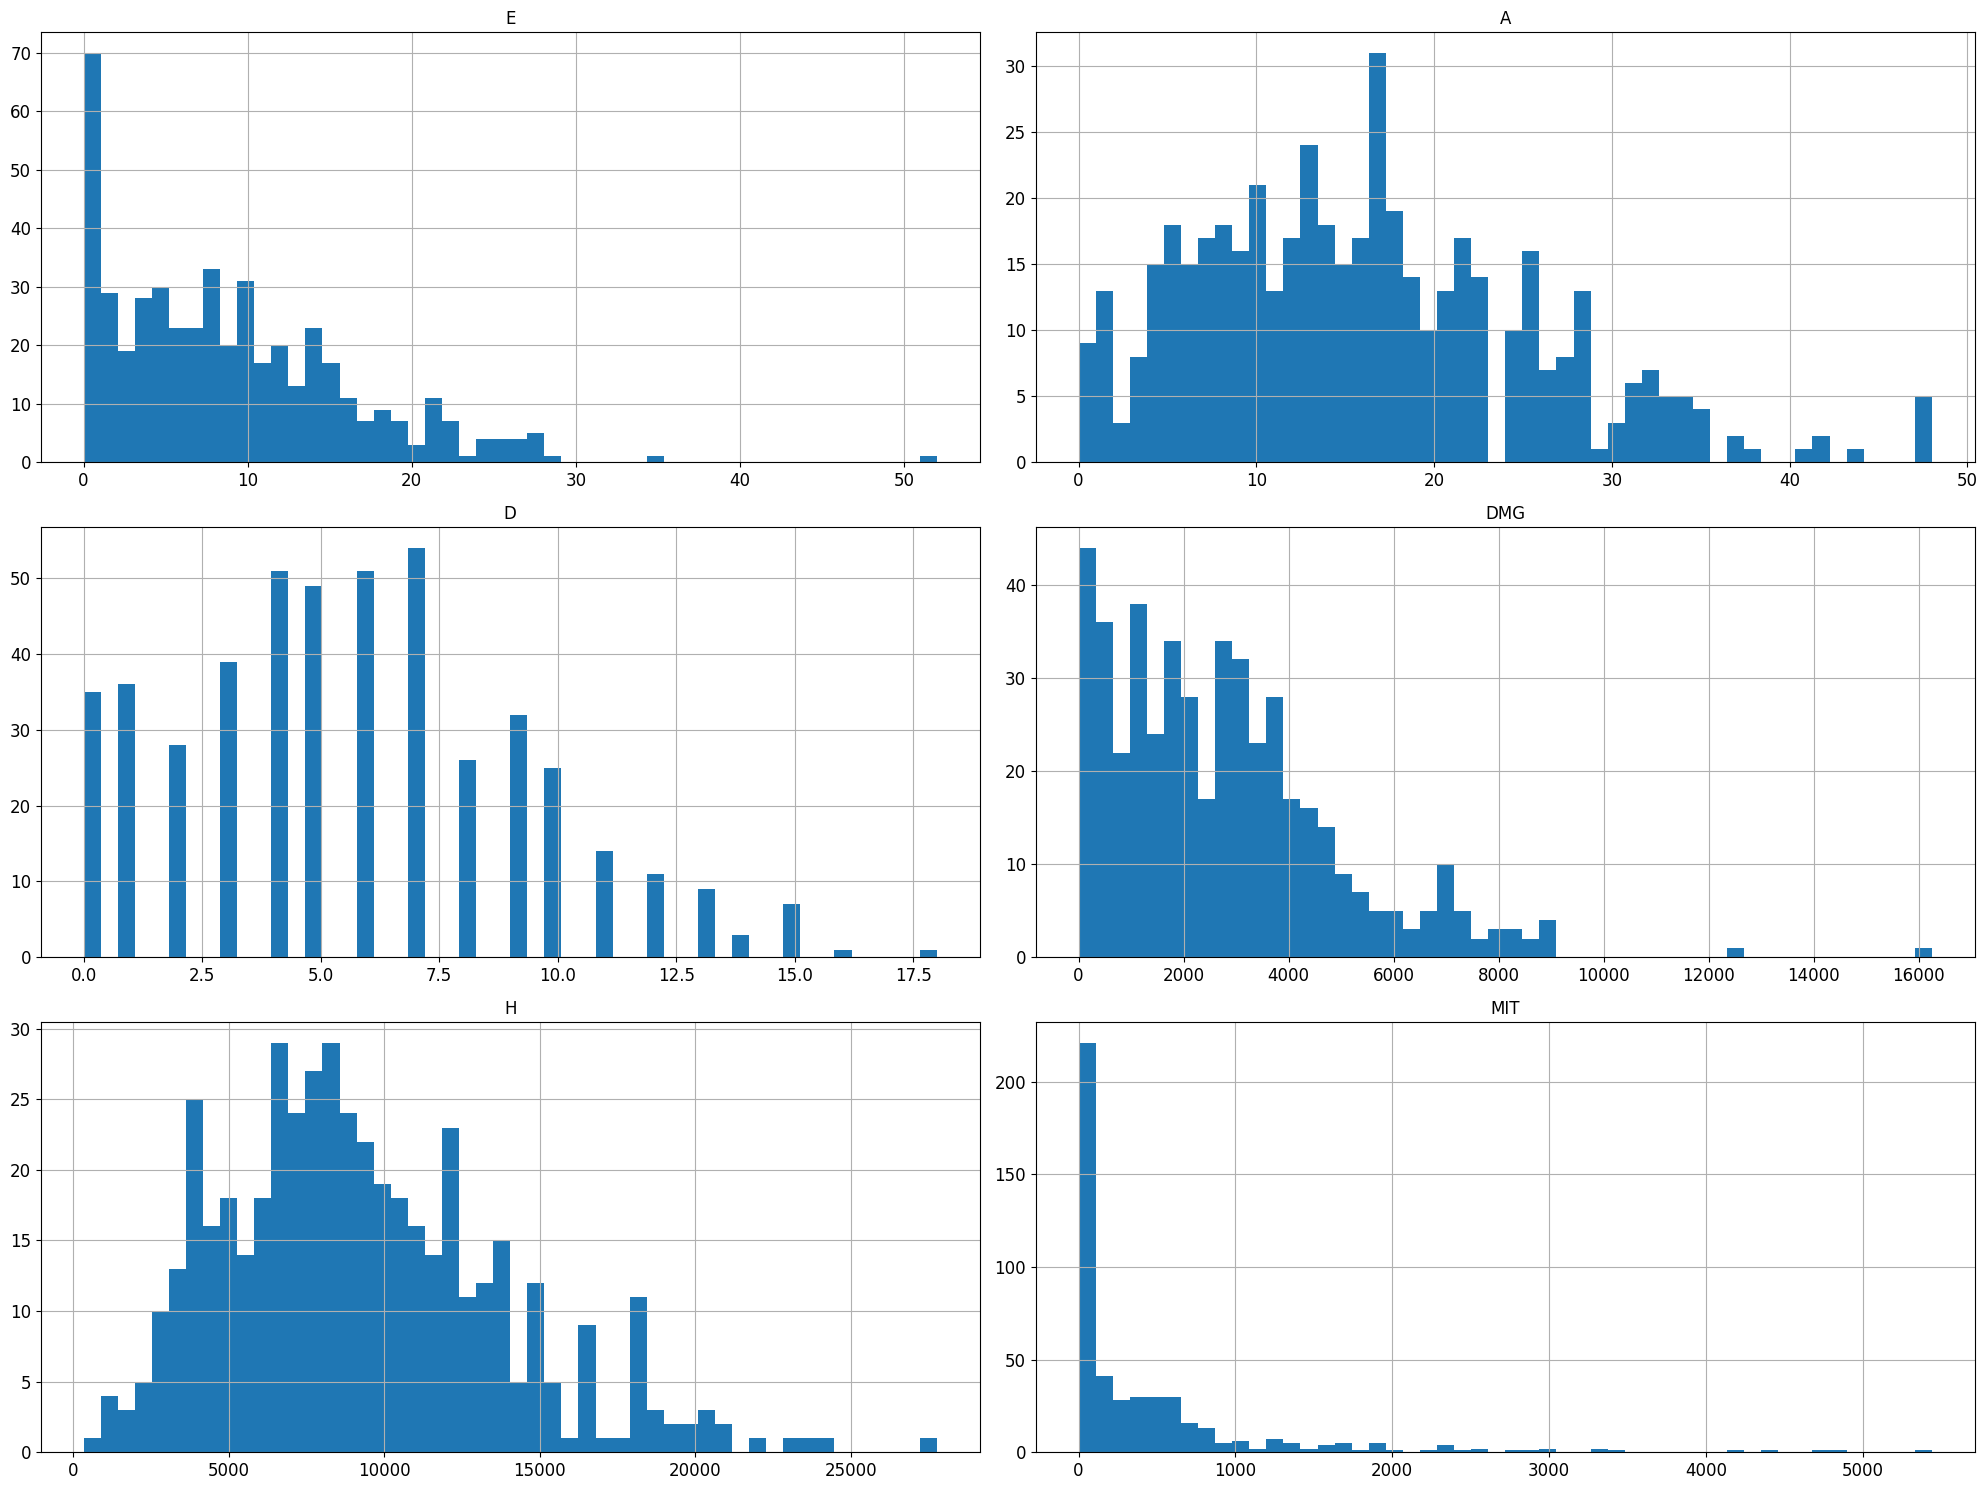

In [8]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [9]:
from sklearn.utils import shuffle

index = scoreboards.index
train_set = scoreboards.loc[shuffle(range(len(index) // players))]
train_set

E   A   D    DMG      H    MIT     GAME
82 0   8   2  10  11195      0  11595   DEFEAT
   1   6   0   6   5235      0      0   DEFEAT
   2   8   0  15   8363    830      0   DEFEAT
   3   0  10  10      0   9697      0   DEFEAT
   4   9   8  11   3148   7493    656   DEFEAT
...   ..  ..  ..    ...    ...    ...      ...
19 5  19   4  10  12751      0  11415  VICTORY
   6  20   1  10  11706   1483      0  VICTORY
   7  22   1  13  10877    285   6265  VICTORY
   8  12  15   8   5251  10988   2441  VICTORY
   9   6  14   7   3713   7995     22  VICTORY

[2360 rows x 7 columns]

In [10]:
scoreboards = train_set.drop('GAME', axis=1)
scoreboards_labels = train_set['GAME'].copy()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(scoreboards)
scoreboards_tr = pd.DataFrame(X, index, scoreboards.columns)
scoreboards_tr

E         A         D       DMG         H       MIT
0   0 -0.570250 -0.620806  0.931834  1.068968 -0.748349  1.996082
    1 -0.764742 -0.851314 -0.095196 -0.218384 -0.748349 -0.496718
    2 -0.570250 -0.851314  2.215621  0.457260 -0.587771 -0.496718
    3 -1.348219  0.301222  0.931834 -1.349136  1.127704 -0.496718
    4 -0.473004  0.070715  1.188591 -0.669173  0.701302 -0.355685
...         ...       ...       ...       ...       ...       ...
235 5  0.499458 -0.390299  0.931834  1.405062 -0.748349  1.957384
    6  0.596704 -0.736060  0.931834  1.179343 -0.461437 -0.496718
    7  0.791197 -0.736060  1.702106  1.000281 -0.693211  0.850189
    8 -0.181265  0.877490  0.418319 -0.214928  1.377470  0.028070
    9 -0.764742  0.762236  0.161561 -0.547134  0.798422 -0.491989

[2360 rows x 6 columns]

In [12]:
features = X.shape[-1] * players
X = X.reshape(-1, features)
X

array([[-0.57024998, -0.62080649,  0.93183378, ..., -1.21176136,
         1.30143728, -0.49671829],
       [ 4.00032068,  0.0707149 , -0.0951961 , ..., -0.34539087,
         2.13876399, -0.32279198],
       [ 0.40221187, -0.15979223, -1.12222597, ..., -0.99533073,
         0.50454524, -0.49671829],
       ...,
       [ 2.24988936,  0.0707149 ,  0.67507631, ..., -0.92664317,
         1.41016593, -0.49671829],
       [ 2.6388741 , -0.2750458 ,  1.18859125, ...,  1.08689603,
         2.11999766, -0.47693928],
       [ 1.56916608, -0.15979223, -0.0951961 , ..., -0.54713358,
         0.79842215, -0.49198852]])

In [13]:
X.shape

(236, 60)

In [14]:
y = scoreboards_labels[::players]
y

82   0     DEFEAT
227  0    VICTORY
137  0    VICTORY
18   0     DEFEAT
168  0    VICTORY
           ...   
210  0    VICTORY
9    0     DEFEAT
117  0    VICTORY
32   0     DEFEAT
19   0     DEFEAT
Name: GAME, Length: 236, dtype: object

In [15]:
y.shape

(236,)

In [16]:
from sklearn import ensemble, linear_model, neighbors, neural_network, svm, tree
from sklearn.model_selection import cross_val_score
from operator import itemgetter

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(8., n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(),
    svm.LinearSVC(),
    svm.NuSVC(nu=.07),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=itemgetter(1), reverse=True)
scores

[(SVC(), 0.8941489361702126),
 (ExtraTreesClassifier(n_jobs=-1), 0.8900709219858156),
 (RandomForestClassifier(n_jobs=-1), 0.8858156028368794),
 (RidgeClassifierCV(), 0.8857269503546099),
 (MLPClassifier(), 0.8857269503546098),
 (GradientBoostingClassifier(), 0.8772163120567376),
 (LogisticRegressionCV(n_jobs=-1), 0.8772163120567376),
 (NearestCentroid(), 0.872872340425532),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8687943262411348),
 (LinearSVC(), 0.8685283687943264),
 (LogisticRegression(n_jobs=-1), 0.864450354609929),
 (KNeighborsClassifier(n_jobs=-1), 0.860195035460993),
 (BaggingClassifier(n_jobs=-1), 0.8562056737588651),
 (NuSVC(nu=0.07), 0.8562056737588651),
 (HistGradientBoostingClassifier(), 0.8560283687943263),
 (RidgeClassifier(), 0.8559397163120567),
 (SGDClassifier(n_jobs=-1), 0.8390070921985815),
 (Perceptron(n_jobs=-1), 0.8307624113475176),
 (DecisionTreeClassifier(), 0.8135638297872341),
 (ExtraTreeClassifier(), 0.8009751773049645),
 (RadiusNeighborsClassifier(n_jobs

In [17]:
estimator = scores[0][0]
estimator

SVC()

In [18]:
estimators = (
    ensemble.AdaBoostClassifier(estimator, algorithm='SAMME'), ensemble.BaggingClassifier(estimator, n_jobs=-1)
)
for estimator in estimators:
    scores.append((estimator, cross_val_score(estimator, X, y, n_jobs=-1).mean()))
scores.sort(key=itemgetter(1), reverse=True)
scores

[(SVC(), 0.8941489361702126),
 (BaggingClassifier(estimator=SVC(), n_jobs=-1), 0.8940602836879432),
 (ExtraTreesClassifier(n_jobs=-1), 0.8900709219858156),
 (RandomForestClassifier(n_jobs=-1), 0.8858156028368794),
 (RidgeClassifierCV(), 0.8857269503546099),
 (MLPClassifier(), 0.8857269503546098),
 (GradientBoostingClassifier(), 0.8772163120567376),
 (LogisticRegressionCV(n_jobs=-1), 0.8772163120567376),
 (NearestCentroid(), 0.872872340425532),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8687943262411348),
 (LinearSVC(), 0.8685283687943264),
 (LogisticRegression(n_jobs=-1), 0.864450354609929),
 (KNeighborsClassifier(n_jobs=-1), 0.860195035460993),
 (BaggingClassifier(n_jobs=-1), 0.8562056737588651),
 (NuSVC(nu=0.07), 0.8562056737588651),
 (HistGradientBoostingClassifier(), 0.8560283687943263),
 (RidgeClassifier(), 0.8559397163120567),
 (SGDClassifier(n_jobs=-1), 0.8390070921985815),
 (Perceptron(n_jobs=-1), 0.8307624113475176),
 (DecisionTreeClassifier(), 0.8135638297872341),
 (ExtraTre

In [29]:
classifiers = []
for i in range(3, len(scores)):
    classifiers.append((i, cross_val_score(ensemble.VotingClassifier([(str(j), scores[j][0]) for j in range(i)], n_jobs=-1), X, y, n_jobs=-1).mean()))
classifiers.sort(key=itemgetter(1), reverse=True)
classifiers

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

[(5, 0.8984042553191489),
 (3, 0.8942375886524822),
 (6, 0.8942375886524822),
 (9, 0.8942375886524822),
 (10, 0.8941489361702126),
 (11, 0.8941489361702126),
 (4, 0.8899822695035461),
 (8, 0.8899822695035461),
 (13, 0.8899822695035461),
 (15, 0.8899822695035461),
 (14, 0.8898936170212766),
 (17, 0.8898936170212766),
 (19, 0.8898936170212766),
 (16, 0.8857269503546098),
 (22, 0.8857269503546098),
 (7, 0.8856382978723405),
 (12, 0.8856382978723403),
 (18, 0.8815602836879431),
 (20, 0.8815602836879431),
 (21, 0.8814716312056736),
 (23, 0.8814716312056736)]

5개 투표가 제일 좋다.

In [ ]:
estimator = ensemble.StackingClassifier([(str(i), scores[i][1]) for i in range(2)], scores[0][1], n_jobs=-1).fit(X, y)
estimator.score(X_test, y_test)

In [ ]:
model = scores[0][1]
for i, (y_true, y_pred) in enumerate(zip(y_test.values, model.predict(X_test))):
    if y_true != y_pred:
        i = y_test.index[i][0]
        defeats = len(defeat) // players
        sum_ = defeats + len(draw) // players
        next_ = i + 1
        if i < defeats:
            print(f'{y_true} ({next_}) -> {y_pred} ({i})')
        elif i < sum_:
            print(f'{y_true} ({next_ - defeats}) -> {y_pred} ({i})')
        else:
            print(f'{y_true} ({next_ - sum_}) -> {y_pred} ({i})')
        print(test.loc[i], end='\n\n')

In [ ]:
for _, model in scores:
    if hasattr(model, 'feature_importances_'):
        print(model)
        importances = model.feature_importances_.reshape(-1, features)

        tank = importances[[0, 5]]
        damage = importances[[1, 2, 6, 7]]
        support = importances[[3, 4, 8, 9]]

        items = '돌격 1인', '공격 1인', '지원 1인'

        print('\n**역할 중요도**')
        sum_ = tank.sum(), damage.sum() / 2, support.sum() / 2
        for s, f in sorted(zip(sum_, items), reverse=True):
            print(f'{f}: {s * 100:.0f}%')

        items = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for s, f in sorted(zip(importances.sum(0), items), reverse=True):
            print(f'{f}: {s * 100:.0f}%')

        print('\n**돌격 1인 특성 중요도**')
        for s, f in sorted(zip(tank.sum(0), items), reverse=True):
            print(f'{f}: {s * 100:.0f}%')

        print('\n**공격 1인 특성 중요도**')
        for s, f in sorted(zip(damage.sum(0) / 2, items), reverse=True):
            print(f'{f}: {s * 100:.0f}%')

        print('\n**지원 1인 특성 중요도**')
        for s, f in sorted(zip(support.sum(0) / 2, items), reverse=True):
            print(f'{f}: {s * 100:.0f}%')

        break